In [3]:
# Import necessary libraries
# import numpy as np
# import os
# import pandas as pd
# from sklearn import preprocessing
# from sklearn.preprocessing import LabelEncoder
# from sklearn.metrics import classification_report
import cv2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_olivetti_faces
import matplotlib.pyplot as plt

In [4]:
# Load the Olivetti Faces dataset
data = fetch_olivetti_faces(shuffle=True, random_state=42)
faces = data.data
labels = data.target

In [5]:
# Print information about the dataset
print(f"Number of samples: {faces.shape[0]}")
print(f"Number of features (pixels): {faces.shape[1]}")
print(f"Number of unique labels (people): {len(set(labels))}")

Number of samples: 400
Number of features (pixels): 4096
Number of unique labels (people): 40


In [6]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(faces, labels, test_size=0.2, random_state=42)


# Use PCA for dimensionality reduction
n_components = 150
pca = PCA(n_components=n_components, whiten=True).fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [7]:
# Train a Decision Tree classifier
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(X_train_pca, y_train)

# Predict using the trained Decision Tree model
y_pred_tree = decision_tree_classifier.predict(X_test_pca)

# Evaluate the Decision Tree model
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"Decision Tree Accuracy: {accuracy_tree:.2f}")

Decision Tree Accuracy: 0.39


In [8]:
# Train a Random Forest classifier
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier.fit(X_train_pca, y_train)

# Predict using the trained Random Forest model
y_pred_forest = random_forest_classifier.predict(X_test_pca)

# Evaluate the Random Forest model
accuracy_forest = accuracy_score(y_test, y_pred_forest)
print(f"Random Forest Accuracy: {accuracy_forest:.2f}")

Random Forest Accuracy: 0.93


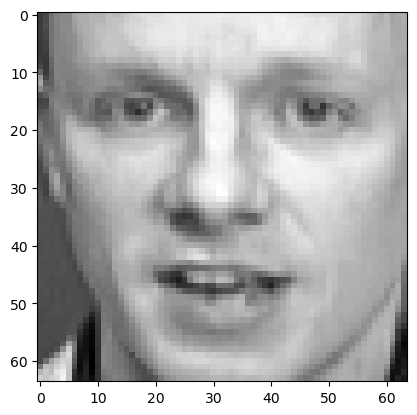

In [9]:
# Show Example:
plt.imshow(data.images[0], cmap="gray")
plt.show()

In [46]:
def getperson(path):
    # Load an example image for testing
    example_image_path = path
    example_image = cv2.imread(example_image_path, cv2.IMREAD_GRAYSCALE)

    # Resize the image to match the training images' size (64x64)
    example_image = cv2.resize(example_image, (64, 64))

    # Flatten the image to match the model's input shape
    example_image_flattened = example_image.flatten().reshape(1, -1)

    # Perform PCA on the example image
    example_image_pca = pca.transform(example_image_flattened)

    # Predict using the trained Random Forest model
    predicted_label = random_forest_classifier.predict(example_image_pca)[0]

    # Get the predicted person's name based on the label
    predicted_name = f"Person {predicted_label}"

    # Display the input image along with the predicted name
    plt.imshow(example_image, cmap='gray')
    plt.title(predicted_name)
    plt.axis('off')
    plt.show()
    return predicted_name

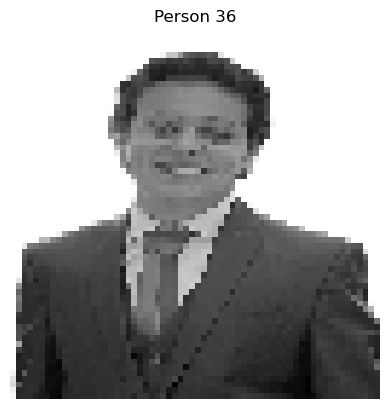

C:\Users\Kerolos\AppData\Local\Temp\ipykernel_14536\2220420198.py:42: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  resized_image = image.resize((230, 300), Image.ANTIALIAS)


In [55]:
import customtkinter
from PIL import ImageTk, Image
import tkinter
# from tkinter import filedialog

#Window Theme
customtkinter.set_appearance_mode("System")  # Modes: system (default), light, dark
customtkinter.set_default_color_theme("dark-blue")  # Themes: blue (default), dark-blue, green

#Starting Window
app=customtkinter.CTk()

#Window Dimensions
w = 800
h = 500
ws = app.winfo_screenwidth()
hs = app.winfo_screenheight()
x = (ws/2) - (w/2)
y = (hs/2) - (h/2)
app.geometry('%dx%d+%d+%d' % (w, h, x, y))
app.title("Face Recognition Project")

#Insert Label
First_Label = customtkinter.CTkLabel(app,text="Upload Your Image",text_color="White",font=("segoe ui",18))
First_Label.pack(pady=10)

#Uupload The Image Function
def upload_the_image():
    
    #Upload Image
    imported_image = tkinter.filedialog.askopenfilename(initialdir="/Pictures",
    title="Select Your Image Please", filetypes=(("png files", "*.jpg"),("all file", "*.*")))

    label.configure(text=getperson(imported_image))

    #image
    # Load the image using PIL
    try:
        # image_label.pack_forget()
        image = Image.open(imported_image)
        
        resized_image = image.resize((230, 300), Image.ANTIALIAS)
        # Convert the image for Tkinter
        tk_image = ImageTk.PhotoImage(resized_image)
        

        # Create a label to display the image
        image_label = tkinter.Label(app, image=tk_image)
        image_label.pack()

        # Keep a reference to the image to prevent garbage collection
        image_label.image = tk_image
    except FileNotFoundError:
        print("File not found. Please provide a valid path to your image file.")
    except Exception as e:
        print("An error occurred while loading the image:", e)

#Import Button
import_button = customtkinter.CTkButton(app,text="Import Image",command=upload_the_image)
import_button.pack()


#Result Image
label = customtkinter.CTkLabel(app,text="",font=("segoe ui",18))
label.pack(pady=20)


#Loop Window 
app.mainloop()
